## 1. Install Dependencies (Python 3.10.11)

In [ ]:
!pip install labelme==5.5.0

In [8]:
!pip install labelme2yolo==0.1.7

  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.6 MB 2.2 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.6 MB 4.4 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.6 MB 7.1 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.6 MB 9.2 MB/s eta 0:00:01
   ----------------------------------- ---- 2.4/2.6 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 10.4 MB/s eta 0:00:00
Using cached rich-13.7.1-py3-none-any.whl (240 kB)
Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Attempting uninstall: pillow
    Found existing installation: pillow 10.4.0
    Uninstalling pillow-10.4.0:
      S

  You can safely remove it manually.


In [1]:
!pip list

Package                 Version
----------------------- ------------
absl-py                 2.1.0
asttokens               2.4.1
beautifulsoup4          4.12.3
cachetools              5.3.3
certifi                 2024.6.2
charset-normalizer      3.3.2
colorama                0.4.6
coloredlogs             15.0.1
comm                    0.2.2
contourpy               1.2.1
cvzone                  1.6.1
cycler                  0.12.1
debugpy                 1.8.2
decorator               5.1.1
exceptiongroup          1.2.1
executing               2.0.1
filelock                3.15.4
filterpy                1.4.5
flatbuffers             24.3.25
fonttools               4.53.0
fsspec                  2024.6.1
gdown                   5.2.0
google-auth             2.31.0
google-auth-oauthlib    0.4.6
grpcio                  1.64.1
humanfriendly           10.0
idna                    3.7
imageio                 2.34.2
imgviz                  1.7.5
intel-openmp            2021.4.0
ipykernel      

## 1. Annotate Images with LabelMe

In [1]:
!labelme

2024-10-17 10:11:05,024 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\agift\.labelmerc


## 2. Convert LabelMe to YOLO Format

In [3]:
image_dir = "images/all in one"

In [5]:
!labelme2yolo --json_dir "{image_dir}" --val_size 0.2 --test_size 0.1


Converting... ----------------------------------------   0% -:--:--
Converting... ----------------------------------------   0% -:--:--
Converting... ----------------------------------------   0% -:--:--
Converting... ----------------------------------------   0% -:--:--
Converting... ----------------------------------------   0% -:--:--
Converting... ----------------------------------------   0% -:--:--
Converting... ----------------------------------------   0% -:--:--
Converting... ----------------------------------------   0% -:--:--
Converting... ----------------------------------------   0% -:--:--
Converting... ----------------------------------------   0% -:--:--
Converting... ----------------------------------------   0% 0:01:28
Converting... ----------------------------------------   1% 0:00:55
Converting...  ---------------------------------------   1% 0:00:30
Converting...  ---------------------------------------   1% 0:00:37
Converting...  --------------------------------

INFO:labelme2yolo:Searching label list from json files ...
INFO:labelme2yolo:Converting train set ...
INFO:labelme2yolo:Converting val set ...
INFO:labelme2yolo:Converting test set ...


## 3. Distribution of the Dataset

In [6]:
import matplotlib.pyplot as plt
import os

### 3.1 Experiment 1

Total number of .jpg images in': 2140


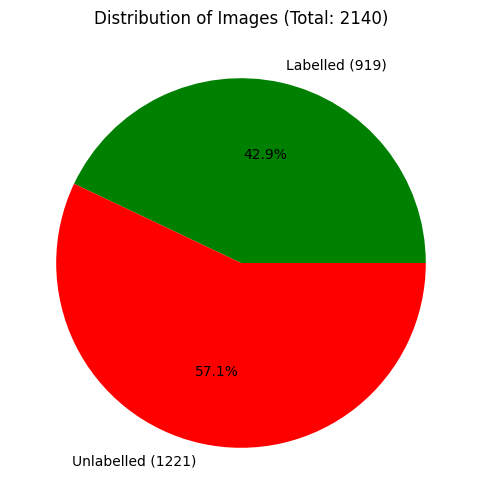

In [38]:
# Directory path containing all the .jpg images
image_dir = "images/all in one"

# Get all files in the directory
files = os.listdir(image_dir)

# Filter out the .jpg files
jpg_files = [file for file in files if file.endswith(".jpg")]

# Count the number of .jpg files in the dataset
total_images_in_dataset = len(jpg_files)

# Define the directories
directories = ["train", "val", "test"]

# Initialize the total count for the directories
total_images_in_dirs = 0

# Loop through each directory
for directory in directories:
    # Directory path containing the .jpg images
    image_dir = os.path.join("dataset", "images", directory)

    # Get all files in the directory
    files = os.listdir(image_dir)

    # Count the number of JPEG files
    num_of_images = len(files)

    # Add to the total images in train, val, and test directories
    total_images_in_dirs += num_of_images

# Display the total number of JPEG images in the directories and dataset
print(f"Total number of .jpg images in': {total_images_in_dataset}")

# Calculate the remaining images not in train, val, or test
remaining_images = total_images_in_dataset - total_images_in_dirs

# Ensure there are no negative values
if remaining_images < 0:
    remaining_images = 0

# Data for the pie chart
labels = [f"Labelled ({total_images_in_dirs})", f"Unlabelled ({remaining_images})"]
counts = [total_images_in_dirs, remaining_images]

# Plotting a pie chart for the combined group and remaining images
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=["green", "red"])
plt.title(f"Distribution of Images (Total: {total_images_in_dataset})")
plt.show()

In [39]:
# Define the directories
directories = ["train", "val", "test"]

# Initialize lists to store total images, counts, and labels for plotting
counts = []
labels = []

Total number of images in each directory:
- 'train' directory: 643
- 'val' directory: 184
- 'test' directory: 92

Total: 919 of 2140 images


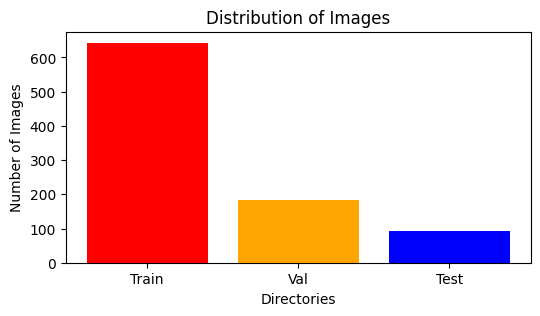

In [40]:
print("Total number of images in each directory:")

# Loop through each directory
for directory in directories:
    # Directory path containing the .jpg images
    image_dir = os.path.join("dataset", "images", directory)

    # Get all files in the directory
    files = os.listdir(image_dir)

    # Count the number of JPEG files
    num_of_images = len(files)

    # Display the total number of JPEG images in the directory
    print(f"- '{directory}' directory: {num_of_images}")

    # Store counts and labels for plotting
    counts.append(num_of_images)
    labels.append(directory.capitalize())

# Display the total number of JPEG images in all directories
print(f"\nTotal: {sum(counts)} of {total_images_in_dataset} images")

# Plotting a bar chart for train, val, and test directories
plt.figure(figsize=(6, 3))
plt.bar(labels, counts, color=["red", "orange", "blue"])
plt.title("Distribution of Images")
plt.xlabel("Directories")
plt.ylabel("Number of Images")
plt.show()

Total images that has been labelled:
- Others: 66
- Plastic: 1171
- Straw: 84
- Paper: 222

Total: 1543


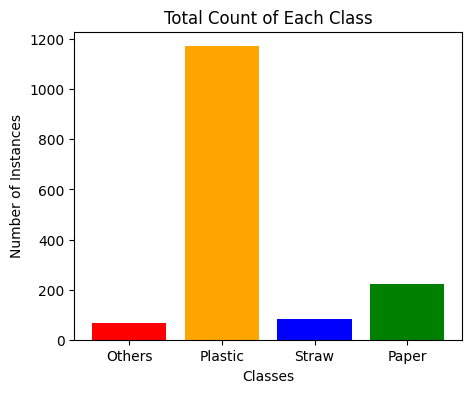

In [41]:
# Define the directories
base_dir = "dataset/labels"

# Initialize a dictionary to store the total count of each class
class_counts = {0: 0, 1: 0, 2: 0, 3: 0}

# Display the total counts for each class with the real names
class_names = {0: "Others", 1: "Plastic", 2: "Straw", 3: "Paper"}


# Function to count the classes in a single file
def count_classes_in_file(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            # Get the first element of each line (the class number)
            class_number = int(line.split()[0])
            # Increase the count for the corresponding class
            if class_number in class_counts:
                class_counts[class_number] += 1


# Loop through each directory and count classes from all .txt files
for directory in directories:
    label_dir = os.path.join(base_dir, directory)
    if os.path.exists(label_dir):
        for file_name in os.listdir(label_dir):
            if file_name.endswith(".txt"):
                file_path = os.path.join(label_dir, file_name)
                count_classes_in_file(file_path)

print("Total images that has been labelled:")
# Display the total counts for each class
for class_num, count in class_counts.items():
    print(f"- {class_names[class_num]}: {count}")
print("\nTotal:", sum(class_counts.values()))

# Plotting the counts
labels = [class_names[i] for i in class_counts.keys()]
counts = [class_counts[i] for i in class_counts.keys()]

plt.figure(figsize=(5, 4))
plt.bar(labels, counts, color=["red", "orange", "blue", "green"])
plt.title("Total Count of Each Class")
plt.xlabel("Classes")
plt.ylabel("Number of Instances")
plt.show()

### 3.2 Experiment 2

Total number of .jpg images in': 2140


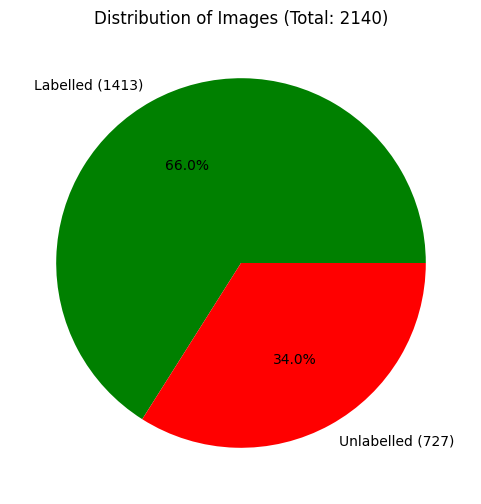

In [28]:
# Directory path containing all the .jpg images
image_dir = "images/all in one"

# Get all files in the directory
files = os.listdir(image_dir)

# Filter out the .jpg files
jpg_files = [file for file in files if file.endswith(".jpg")]

# Count the number of .jpg files in the dataset
total_images_in_dataset = len(jpg_files)

# Define the directories
directories = ["train", "val", "test"]

# Initialize the total count for the directories
total_images_in_dirs = 0

# Loop through each directory
for directory in directories:
    # Directory path containing the .jpg images
    image_dir = os.path.join("dataset", "images", directory)

    # Get all files in the directory
    files = os.listdir(image_dir)

    # Count the number of JPEG files
    num_of_images = len(files)

    # Add to the total images in train, val, and test directories
    total_images_in_dirs += num_of_images

# Display the total number of JPEG images in the directories and dataset
print(f"Total number of .jpg images in': {total_images_in_dataset}")

# Calculate the remaining images not in train, val, or test
remaining_images = total_images_in_dataset - total_images_in_dirs

# Ensure there are no negative values
if remaining_images < 0:
    remaining_images = 0

# Data for the pie chart
labels = [f"Labelled ({total_images_in_dirs})", f"Unlabelled ({remaining_images})"]
counts = [total_images_in_dirs, remaining_images]

# Plotting a pie chart for the combined group and remaining images
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=["green", "red"])
plt.title(f"Distribution of Images (Total: {total_images_in_dataset})")
plt.show()

In [29]:
# Define the directories
directories = ["train", "val", "test"]

# Initialize lists to store total images, counts, and labels for plotting
counts = []
labels = []

Total number of images in each directory:
- 'train' directory: 989
- 'val' directory: 283
- 'test' directory: 141

Total: 1413 of 2140 images


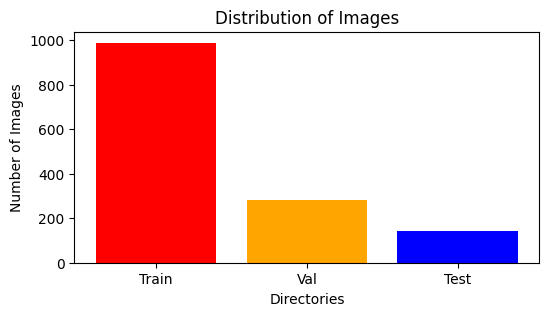

In [30]:
print("Total number of images in each directory:")

# Loop through each directory
for directory in directories:
    # Directory path containing the .jpg images
    image_dir = os.path.join("dataset", "images", directory)

    # Get all files in the directory
    files = os.listdir(image_dir)

    # Count the number of JPEG files
    num_of_images = len(files)

    # Display the total number of JPEG images in the directory
    print(f"- '{directory}' directory: {num_of_images}")

    # Store counts and labels for plotting
    counts.append(num_of_images)
    labels.append(directory.capitalize())

# Display the total number of JPEG images in all directories
print(f"\nTotal: {sum(counts)} of {total_images_in_dataset} images")

# Plotting a bar chart for train, val, and test directories
plt.figure(figsize=(6, 3))
plt.bar(labels, counts, color=["red", "orange", "blue"])
plt.title("Distribution of Images")
plt.xlabel("Directories")
plt.ylabel("Number of Images")
plt.show()

Total images that has been labelled:
- Others: 139
- Plastic: 2274
- Straw: 110
- Paper: 224

Total: 2747


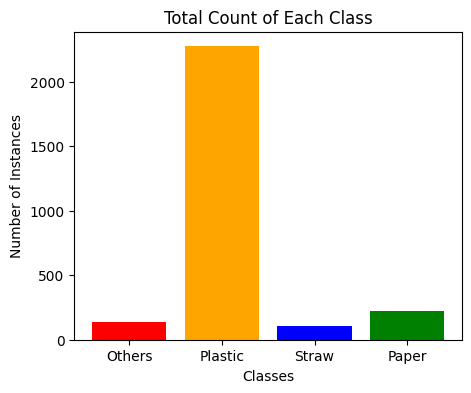

In [31]:
# Define the directories
base_dir = "dataset/labels"

# Initialize a dictionary to store the total count of each class
class_counts = {0: 0, 1: 0, 2: 0, 3: 0}

# Display the total counts for each class with the real names
class_names = {0: "Others", 1: "Plastic", 2: "Straw", 3: "Paper"}


# Function to count the classes in a single file
def count_classes_in_file(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            # Get the first element of each line (the class number)
            class_number = int(line.split()[0])
            # Increase the count for the corresponding class
            if class_number in class_counts:
                class_counts[class_number] += 1


# Loop through each directory and count classes from all .txt files
for directory in directories:
    label_dir = os.path.join(base_dir, directory)
    if os.path.exists(label_dir):
        for file_name in os.listdir(label_dir):
            if file_name.endswith(".txt"):
                file_path = os.path.join(label_dir, file_name)
                count_classes_in_file(file_path)

print("Total images that has been labelled:")
# Display the total counts for each class
for class_num, count in class_counts.items():
    print(f"- {class_names[class_num]}: {count}")
print("\nTotal:", sum(class_counts.values()))

# Plotting the counts
labels = [class_names[i] for i in class_counts.keys()]
counts = [class_counts[i] for i in class_counts.keys()]

plt.figure(figsize=(5, 4))
plt.bar(labels, counts, color=["red", "orange", "blue", "green", "indigo"])
plt.title("Total Count of Each Class")
plt.xlabel("Classes")
plt.ylabel("Number of Instances")
plt.show()

### 3.3 Experiment 3

Total number of .jpg images in': 1070


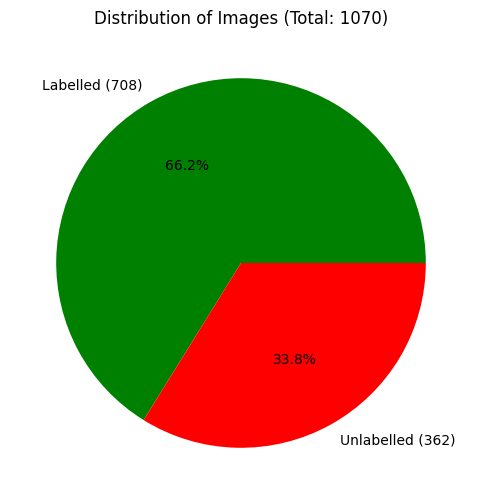

In [48]:
# Directory path containing all the .jpg images
image_dir = "images/all in one"

# Get all files in the directory
files = os.listdir(image_dir)

# Filter out the .jpg files
jpg_files = [file for file in files if file.endswith(".jpg")]

# Count the number of .jpg files in the dataset
total_images_in_dataset = len(jpg_files)

# Define the directories
directories = ["train", "val", "test"]

# Initialize the total count for the directories
total_images_in_dirs = 0

# Loop through each directory
for directory in directories:
    # Directory path containing the .jpg images
    image_dir = os.path.join("dataset", "images", directory)

    # Get all files in the directory
    files = os.listdir(image_dir)

    # Count the number of JPEG files
    num_of_images = len(files)

    # Add to the total images in train, val, and test directories
    total_images_in_dirs += num_of_images

# Display the total number of JPEG images in the directories and dataset
print(f"Total number of .jpg images in': {total_images_in_dataset}")

# Calculate the remaining images not in train, val, or test
remaining_images = total_images_in_dataset - total_images_in_dirs

# Ensure there are no negative values
if remaining_images < 0:
    remaining_images = 0

# Data for the pie chart
labels = [f"Labelled ({total_images_in_dirs})", f"Unlabelled ({remaining_images})"]
counts = [total_images_in_dirs, remaining_images]

# Plotting a pie chart for the combined group and remaining images
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=["green", "red"])
plt.title(f"Distribution of Images (Total: {total_images_in_dataset})")
plt.show()

In [49]:
# Define the directories
directories = ["train", "val", "test"]

# Initialize lists to store total images, counts, and labels for plotting
counts = []
labels = []

Total number of images in each directory:
- 'train' directory: 495
- 'val' directory: 142
- 'test' directory: 71

Total: 708 of 1070 images


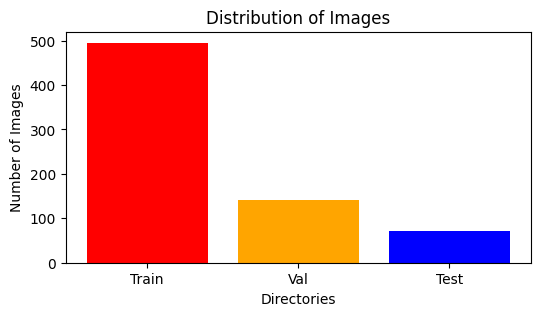

In [50]:
print("Total number of images in each directory:")

# Loop through each directory
for directory in directories:
    # Directory path containing the .jpg images
    image_dir = os.path.join("dataset", "images", directory)

    # Get all files in the directory
    files = os.listdir(image_dir)

    # Count the number of JPEG files
    num_of_images = len(files)

    # Display the total number of JPEG images in the directory
    print(f"- '{directory}' directory: {num_of_images}")

    # Store counts and labels for plotting
    counts.append(num_of_images)
    labels.append(directory.capitalize())

# Display the total number of JPEG images in all directories
print(f"\nTotal: {sum(counts)} of {total_images_in_dataset} images")

# Plotting a bar chart for train, val, and test directories
plt.figure(figsize=(6, 3))
plt.bar(labels, counts, color=["red", "orange", "blue"])
plt.title("Distribution of Images")
plt.xlabel("Directories")
plt.ylabel("Number of Images")
plt.show()

Total images that has been labelled:
- Others: 69
- Plastic: 1139
- Straw: 55
- Paper: 112

Total: 1375


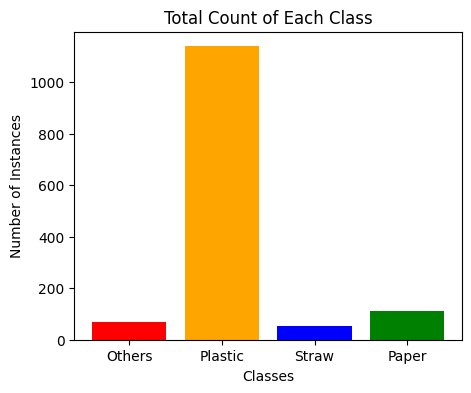

In [51]:
# Define the directories
base_dir = "dataset/labels"

# Initialize a dictionary to store the total count of each class
class_counts = {0: 0, 1: 0, 2: 0, 3: 0}

# Display the total counts for each class with the real names
class_names = {0: "Others", 1: "Plastic", 2: "Straw", 3: "Paper"}


# Function to count the classes in a single file
def count_classes_in_file(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            # Get the first element of each line (the class number)
            class_number = int(line.split()[0])
            # Increase the count for the corresponding class
            if class_number in class_counts:
                class_counts[class_number] += 1


# Loop through each directory and count classes from all .txt files
for directory in directories:
    label_dir = os.path.join(base_dir, directory)
    if os.path.exists(label_dir):
        for file_name in os.listdir(label_dir):
            if file_name.endswith(".txt"):
                file_path = os.path.join(label_dir, file_name)
                count_classes_in_file(file_path)

print("Total images that has been labelled:")
# Display the total counts for each class
for class_num, count in class_counts.items():
    print(f"- {class_names[class_num]}: {count}")
print("\nTotal:", sum(class_counts.values()))

# Plotting the counts
labels = [class_names[i] for i in class_counts.keys()]
counts = [class_counts[i] for i in class_counts.keys()]

plt.figure(figsize=(5, 4))
plt.bar(labels, counts, color=["red", "orange", "blue", "green", "indigo"])
plt.title("Total Count of Each Class")
plt.xlabel("Classes")
plt.ylabel("Number of Instances")
plt.show()

### 3.4 Experiment 4

Total number of .jpg images in': 1520


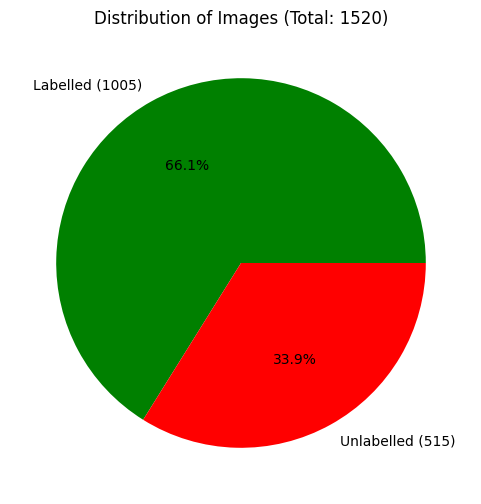

In [23]:
# Directory path containing all the .jpg images
image_dir = "images/all in one"

# Get all files in the directory
files = os.listdir(image_dir)

# Filter out the .jpg files
jpg_files = [file for file in files if file.endswith(".jpg")]

# Count the number of .jpg files in the dataset
total_images_in_dataset = len(jpg_files)

# Define the directories
directories = ["train", "val", "test"]

# Initialize the total count for the directories
total_images_in_dirs = 0

# Loop through each directory
for directory in directories:
    # Directory path containing the .jpg images
    image_dir = os.path.join("dataset", "images", directory)

    # Get all files in the directory
    files = os.listdir(image_dir)

    # Count the number of JPEG files
    num_of_images = len(files)

    # Add to the total images in train, val, and test directories
    total_images_in_dirs += num_of_images

# Display the total number of JPEG images in the directories and dataset
print(f"Total number of .jpg images in': {total_images_in_dataset}")

# Calculate the remaining images not in train, val, or test
remaining_images = total_images_in_dataset - total_images_in_dirs

# Ensure there are no negative values
if remaining_images < 0:
    remaining_images = 0

# Data for the pie chart
labels = [f"Labelled ({total_images_in_dirs})", f"Unlabelled ({remaining_images})"]
counts = [total_images_in_dirs, remaining_images]

# Plotting a pie chart for the combined group and remaining images
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=["green", "red"])
plt.title(f"Distribution of Images (Total: {total_images_in_dataset})")
plt.show()

In [24]:
# Define the directories
directories = ["train", "val", "test"]

# Initialize lists to store total images, counts, and labels for plotting
counts = []
labels = []

Total number of images in each directory:
- 'train' directory: 704
- 'val' directory: 201
- 'test' directory: 100

Total: 1005 of 1520 images


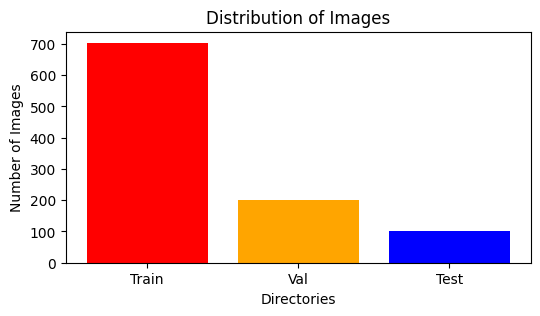

In [25]:
print("Total number of images in each directory:")

# Loop through each directory
for directory in directories:
    # Directory path containing the .jpg images
    image_dir = os.path.join("dataset", "images", directory)

    # Get all files in the directory
    files = os.listdir(image_dir)

    # Count the number of JPEG files
    num_of_images = len(files)

    # Display the total number of JPEG images in the directory
    print(f"- '{directory}' directory: {num_of_images}")

    # Store counts and labels for plotting
    counts.append(num_of_images)
    labels.append(directory.capitalize())

# Display the total number of JPEG images in all directories
print(f"\nTotal: {sum(counts)} of {total_images_in_dataset} images")

# Plotting a bar chart for train, val, and test directories
plt.figure(figsize=(6, 3))
plt.bar(labels, counts, color=["red", "orange", "blue", "green", "indigo", "purple", "brown"])
plt.title("Distribution of Images")
plt.xlabel("Directories")
plt.ylabel("Number of Images")
plt.show()

Total images that have been labelled:
- Others: 195
- Plastic: 1348
- Straw: 280
- Paper: 112
- Tissue: 50
- Bottle: 54
- Beverage Carton Box: 198
- Cigarette Pack: 148

Total: 2385


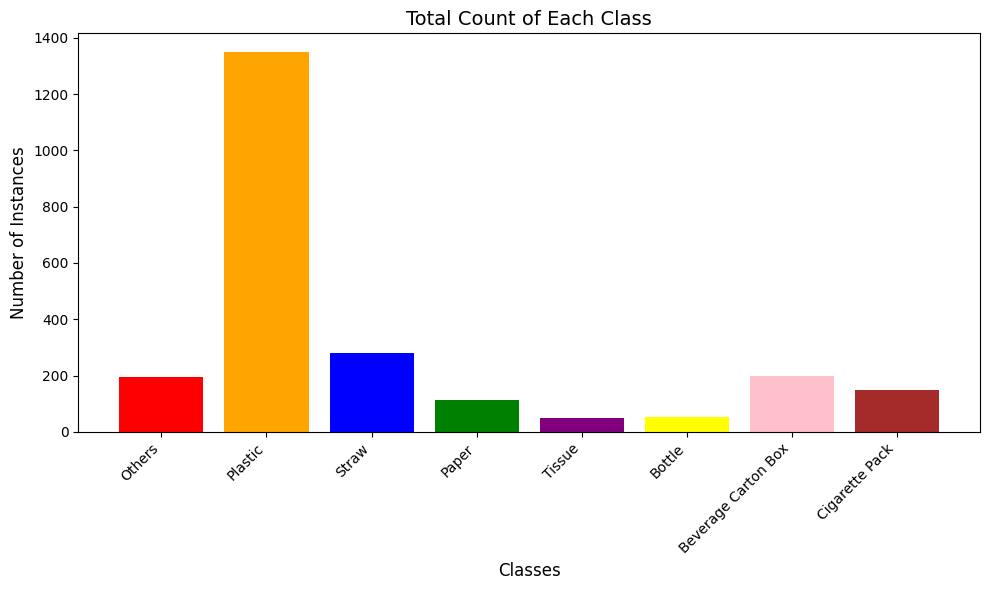

In [26]:
import os
import matplotlib.pyplot as plt

# Define the directories
base_dir = "dataset/labels"
directories = ["test", "train", "val"]  # Add the directories you want to check

# Initialize a dictionary to store the total count of each class
class_counts = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}

# Display the total counts for each class with the real names
class_names = {
    0: "Others",
    1: "Plastic",
    2: "Straw",
    3: "Paper",
    4: "Tissue",
    5: "Bottle",
    6: "Beverage Carton Box",
    7: "Cigarette Pack",
}


# Function to count the classes in a single file
def count_classes_in_file(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            # Get the first element of each line (the class number)
            class_number = int(line.split()[0])
            # Increase the count for the corresponding class
            if class_number in class_counts:
                class_counts[class_number] += 1


# Loop through each directory and count classes from all .txt files
for directory in directories:
    label_dir = os.path.join(base_dir, directory)
    if os.path.exists(label_dir):
        for file_name in os.listdir(label_dir):
            if file_name.endswith(".txt"):
                file_path = os.path.join(label_dir, file_name)
                count_classes_in_file(file_path)

print("Total images that have been labelled:")
# Display the total counts for each class
for class_num, count in class_counts.items():
    print(f"- {class_names[class_num]}: {count}")
print("\nTotal:", sum(class_counts.values()))

# Plotting the counts
labels = [class_names[i] for i in class_counts.keys()]
counts = [class_counts[i] for i in class_counts.keys()]

plt.figure(figsize=(10, 6))
plt.bar(
    labels,
    counts,
    color=["red", "orange", "blue", "green", "purple", "yellow", "pink", "brown"],
)
plt.title("Total Count of Each Class", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Number of Instances", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate class names for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()